# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = pd.merge(mouse_metadata, study_results, how ="outer")

# Display the data table for preview
complete_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
mice_count = len(complete_data["Mouse ID"].unique())
mice_count

249

In [24]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicated = complete_data[complete_data.duplicated(["Mouse ID", "Timepoint"])]
mice_duplicated_ID = mice_duplicated["Mouse ID"].unique()
mice_duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [27]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_duplicated = complete_data.loc[complete_data["Mouse ID"]=="g989",:]
mice_duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [29]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = complete_data.drop(complete_data[complete_data['Mouse ID'] == 'g989'].index, inplace=False)
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [31]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = len(cleaned_data["Mouse ID"].unique())
clean_mice_count

248

## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
groupby_drug_name = cleaned_data.groupby("Drug Regimen")


# mean, median, variance, standard deviation, and SEM of the tumor volume.

mean = groupby_drug_name["Tumor Volume (mm3)"].mean()
median = groupby_drug_name["Tumor Volume (mm3)"].median()
stdev = groupby_drug_name["Tumor Volume (mm3)"].std()
variance = groupby_drug_name["Tumor Volume (mm3)"].var()
sem = groupby_drug_name["Tumor Volume (mm3)"].sem() 

# Assemble the resulting series into a single summary DataFrame.
drug_name_df = pd.DataFrame({"Mean Tumor Volume":mean, "Median Tumor Volume":median, "Tumor Volume Variance":variance, "Tumor Volume Std. Dev.":stdev, "Tumor Volume Std. Err.": sem})
drug_name_df 

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [38]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
new_drug_name_df = cleaned_data.groupby("Drug Regimen").agg({"Mouse ID": ["count"],"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
new_drug_name_df

Mouse ID Tumor Volume (mm3)                                  \
                count               mean     median        var       std   
Drug Regimen                                                               
Capomulin         230          40.675741  41.557809  24.947764  4.994774   
Ceftamin          178          52.591172  51.776157  39.290177  6.268188   
Infubinol         178          52.884795  51.820584  43.128684  6.567243   
Ketapril          188          55.235638  53.698743  68.553577  8.279709   
Naftisol          186          54.331565  52.509285  66.173479  8.134708   
Placebo           181          54.033581  52.288934  61.168083  7.821003   
Propriva          148          52.320930  50.446266  43.852013  6.622085   
Ramicane          228          40.216745  40.673236  23.486704  4.846308   
Stelasyn          181          54.233149  52.431737  59.450562  7.710419   
Zoniferol         182          53.236507  51.818479  48.533355  6.966589   

                        
                   sem  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.544332  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

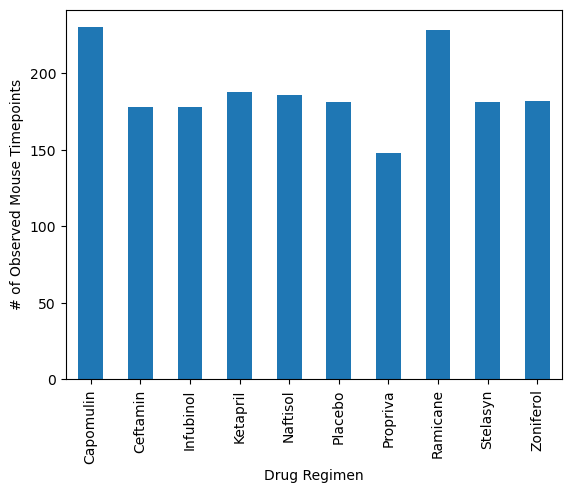

In [68]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
groupby_drug_mouse = groupby_drug_name["Mouse ID"].count()
drug_regimen_bar = groupby_drug_mouse.plot(kind="bar")
drug_regimen_bar.set_ylabel("# of Observed Mouse Timepoints")


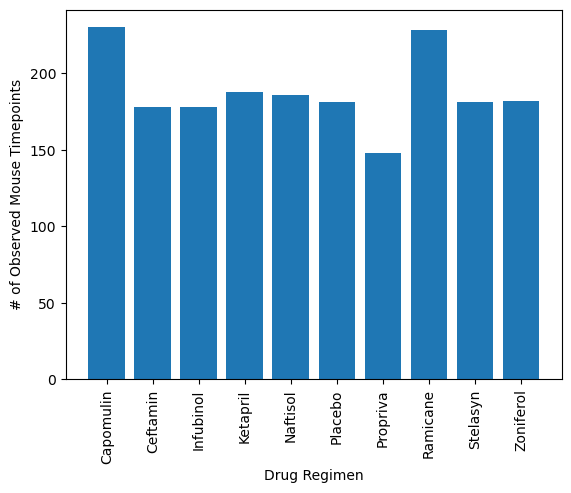

In [50]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = new_drug_name_df.index
y_axis = groupby_drug_name["Mouse ID"].count()
plt.bar(x_axis,y_axis, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = 90)
plt.show()


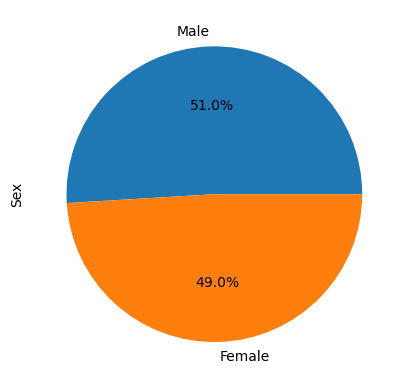

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = cleaned_data["Sex"].value_counts()
total_number = cleaned_data["Sex"].count()
sex_count_pie = sex_count.plot(kind="pie", y=total_number, autopct="%1.1f%%")
plt.show()

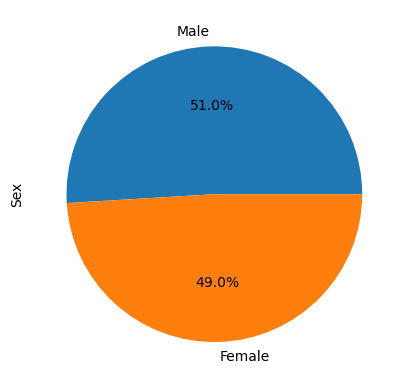

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_count = cleaned_data["Sex"].value_counts()["Male"]
female_count = cleaned_data["Sex"].value_counts()["Female"]
sex_list = ["Male", "Female"]
sex_count_new = [male_count,female_count]
plt.pie(sex_count_new,labels=sex_list,autopct="%1.1f%%")
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [260]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#Capomulin_count = groupby_drug_name.loc[:,"Capomulin"]
#groupby_drug_name.head()
# Start by getting the last (greatest) timepoint for each mouse
mouse_unique = cleaned_data.groupby("Mouse ID")
max_timepoint = mouse_unique["Timepoint"].max()
max_timepoint = max_timepoint.reset_index()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_volume = max_timepoint.merge(cleaned_data, on = ["Mouse ID","Timepoint"])
last_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [273]:
# Put treatments into a list for for loop (and later for plot labels)
druglist = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

master_tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in druglist:
    tumor_volume = []
    outlier = []
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatments = pd.DataFrame(last_volume.loc[last_volume["Drug Regimen"] == drug,:])
    tumor_volume = treatments["Tumor Volume (mm3)"].values.tolist()
    ##tumor_volume.append(treatments["Tumor Volume (mm3)"])
    # add subset 
    quartiles = treatments["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75]) 
    quartile1 = quartiles[0.25]
    quartile2 = quartiles[0.5]
    quartile3 = quartiles[0.75]
    IQR = quartile3 - quartile1
    ubound = quartile3 + 1.5*IQR
    lbound = quartile1 - 1.5*IQR
    for volume in tumor_volume:
        if volume > ubound or volume < lbound:
            outlier.append(volume)
    master_tumor_volume.append(tumor_volume)        
    # Determine outliers using upper and lower bounds
    print(f'{drug} s potential outliers:  {outlier}')
    
    


Capomulin s potential outliers:  []
Ramicane s potential outliers:  []
Infubinol s potential outliers:  [36.3213458]
Ceftamin s potential outliers:  []


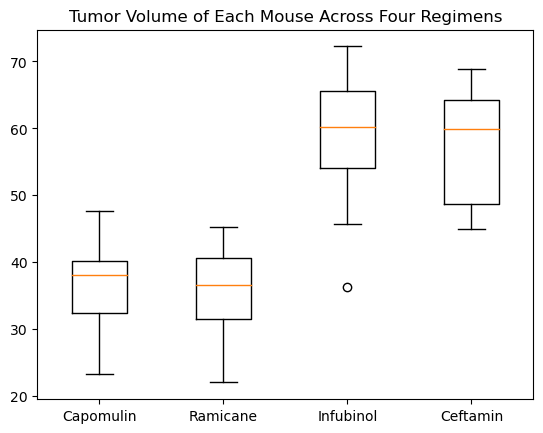

In [276]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Each Mouse Across Four Regimens')
ax1.boxplot(master_tumor_volume)
plt.xticks([1, 2, 3, 4], druglist)
plt.show()

## Line and Scatter Plots

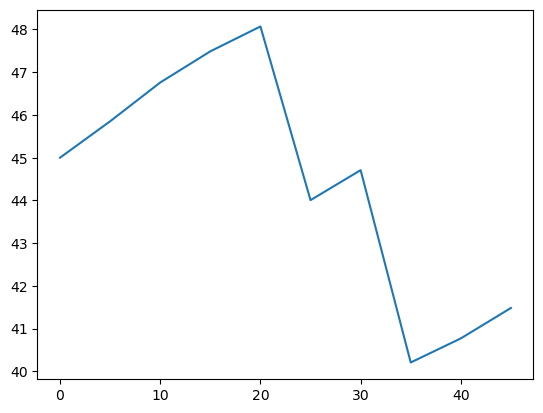

In [135]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df = pd.DataFrame(complete_data.loc[complete_data["Drug Regimen"] == "Capomulin",:]).reset_index()
Capomulin_l509_df = pd.DataFrame(complete_data.loc[complete_data["Mouse ID"] == "l509",:]).reset_index()
time = Capomulin_l509_df["Timepoint"].to_list()
volume = Capomulin_l509_df["Tumor Volume (mm3)"].to_list()
Capomulin_vs_time,= plt.plot(time, volume)


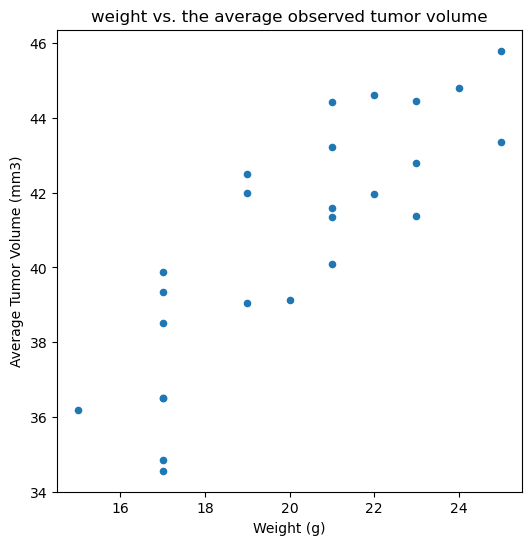

In [142]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_by_mouse = Capomulin_df.groupby(["Mouse ID"])
plot_data = Capomulin_by_mouse[["Weight (g)", "Tumor Volume (mm3)"]]
average = plot_data.mean()
average = average.rename(columns = {"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})
average.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)", figsize=(6,6),
              title="weight vs. the average observed tumor volume")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


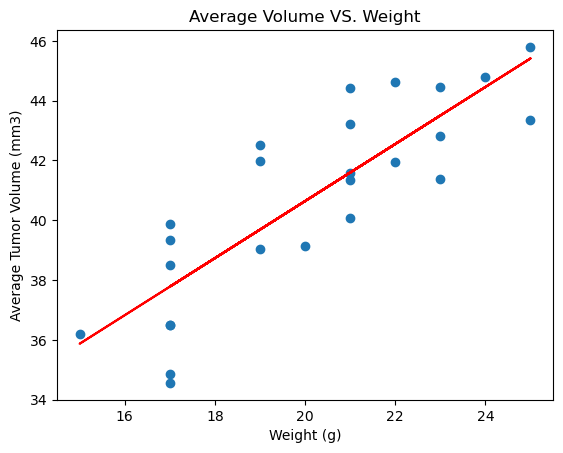

In [146]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = round(average["Weight (g)"].corr(average["Average Tumor Volume (mm3)"]),2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")

weight = average.iloc[:,0]
Avg_volume = average.iloc[:,1]

ATV_slope, ATV_int, ATV_r, ATV_p, ATV_std_err = st.linregress(weight,Avg_volume)
ATV_fit = ATV_slope * weight + ATV_int


plt.scatter(weight,Avg_volume)
plt.plot(weight,ATV_fit,"-",color = "r")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Average Volume VS. Weight")
plt.show()